# Analiza objaśniająca i storytelling
## Autor: Tomasz Pawlik

## Opis oraz Cel

Zeszyt przedstawia czyszczenie oraz kompletną analizę danych

## Przegląd oraz przygotowanie danych do analizy

Na wstępie zaimportowano biblioteki które będą przydatne w procesie przygotowania zbioru, oraz wczytano zbiór danych z pliku csv. Zbiór na którym będą przeprowadzana operacje to "IT Salary Survey EU 2018".

W pierwszym kroku wyświetlono zbiór wraz z typami kolumn zaczytanego zbioru danych by dostępny był punkt odniesienia na dalszej drodze czyszczenia

In [1]:
%config IPCompleter.greedy=True

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplot
import warnings
warnings.filterwarnings('ignore')

pd.options.mode.chained_assignment = None
df = pd.read_csv("data/IT Salary Survey EU 2018.csv")
df_org = df.copy(deep=True)
df

,Timestamp,Age,Gender,City,Position,Years of experience,Your level,Current Salary,Salary one year ago,Salary two years ago,Are you getting any Stock Options?,Main language at work,Company size,Company type
0,14/12/2018 12:41:33,43.0,M,München,QA Ingenieur,11.0,Senior,77000.0,76200.0,68000.0,No,Deutsch,100-1000,Product
1,14/12/2018 12:42:09,33.0,F,München,Senior PHP Magento developer,8.0,Senior,65000.0,55000.0,55000.0,No,Deutsch,50-100,Product
2,14/12/2018 12:47:36,32.0,M,München,Software Engineer,10.0,Senior,88000.0,73000.0,54000.0,No,Deutsch,1000+,Product
3,14/12/2018 12:50:15,25.0,M,München,Senior Frontend Developer,6.0,Senior,78000.0,55000.0,45000.0,Yes,English,1000+,Product
4,14/12/2018 12:50:31,39.0,M,München,UX Designer,10.0,Senior,69000.0,60000.0,52000.0,No,English,100-1000,Ecom retailer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,03/06/2020 20:12:51,40.0,M,Köln,Java Developer junior,1.0,Junior,44000.0,40000.0,40000.0,Yes,Deutsch,10-50,Product
761,28/07/2020 04:03:13,NaN,M,Köln,E.g. C# Developer,1.0,Junior,45000.0,40000.0,40000.0,Yes,Deutsch,10-50,Product
762,28/07/2020 04:03:20,NaN,M,Köln,E.g. C# Developer,1.0,Junior,45000.0,40000.0,40000.0,Yes,Deutsch,10-50,Product
763,26/08/2020 09:06:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
print(df.columns.tolist())

['Timestamp', 'Age', 'Gender', 'City', 'Position', 'Years of experience', 'Your level', 'Current Salary', 'Salary one year ago', 'Salary two years ago', 'Are you getting any Stock Options?', 'Main language at work', 'Company size', 'Company type']


Na zbiór składa się 14 kolumn o następującym znaczeniu:
* Timestamp - sygnatura czasowa daty ankietowania
* Age - wiek osoby ankietowanej
* Gender - płeć osoby ankietowanej
* City - miasto
* Position - obejmowane stanowisko
* Years of experience - doświadczenie zawodowe w latach
* Your level - poziom doświadczenia
* Current Salary - obecne wynagrodzenie
* Salary one year ago - wynagrodzenie rok przed ankietą
* Salary two years ago - wynagrodzenie dwa lata przed ankietą
* Are you getting any Stock options? - fakt czy osoba ankietowana otrzymuje w pracy opcje na akcje
* Main language at work - główny język wykorzystywany w pracy
* Company size - rozmiar firmy
* Company type - rodzaj firmy

Typy kolumn zostały przedstawione poniżej

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Timestamp                           765 non-null    object 
 1   Age                                 672 non-null    float64
 2   Gender                              751 non-null    object 
 3   City                                736 non-null    object 
 4   Position                            737 non-null    object 
 5   Years of experience                 732 non-null    float64
 6   Your level                          743 non-null    object 
 7   Current Salary                      750 non-null    float64
 8   Salary one year ago                 596 non-null    float64
 9   Salary two years ago                463 non-null    float64
 10  Are you getting any Stock Options?  742 non-null    object 
 11  Main language at work               750 non-n

Jak można zaobserwować w prawie każdej kolumnie występują brakujące wartości danych oprócz sygnatury czasowej. Stwierdzić to można po zauważalnie mniejszej liczbie w każdej z pozycji powyższej tabeli dla wartości nie będących pustymi, względem wartości ogólnej liczby rzędów zbioru danych zaprezentowanym wyżej (765 rzędów x 14 kolumn).

Kilka z kolumn w swojej naturze prezentują dane typu wyliczeniowego o skończonym zbiorze możliwych wartości. Są to kolumny takie jak "Gender", "Your level", "Main language at work", "Are you getting any stock options", "City", "Company size". Nic nie stoi na przeszkodzie by móc je teraz wypisać.

In [4]:
df.nunique()

Timestamp                             761
Age                                    33
Gender                                  2
City                                   74
Position                              397
Years of experience                    30
Your level                              3
Current Salary                        139
Salary one year ago                   125
Salary two years ago                  105
Are you getting any Stock Options?      2
Main language at work                   7
Company size                            5
Company type                           49
dtype: int64

In [5]:
print(df['Gender'].value_counts(dropna=False))
print("\n")
print(df['Your level'].value_counts(dropna=False))
print("\n")
print(df['Main language at work'].value_counts(dropna=False))
print("\n")
print(df['Are you getting any Stock Options?'].value_counts(dropna=False))
print("\n")
print(df['City'].value_counts(dropna=False))
print("\n")
print(df['Company size'].value_counts(dropna=False))
print("\n")

M      646
F      105
NaN     14
Name: Gender, dtype: int64


Senior    497
Middle    206
Junior     40
NaN        22
Name: Your level, dtype: int64


English                                  581
Deutsch                                  134
Russian                                   29
NaN                                       15
Polish                                     2
French                                     2
Team - Russian; Cross-team - English;      1
Deutsch/Englisch                           1
Name: Main language at work, dtype: int64


No     587
Yes    155
NaN     23
Name: Are you getting any Stock Options?, dtype: int64


Berlin       291
München      249
Frankfurt     33
NaN           29
Köln          20
            ... 
Zurich         1
Dresden        1
Krakau         1
Mannheim       1
Siegen         1
Name: City, Length: 75, dtype: int64


100-1000    260
1000+       219
50-100      120
10-50       117
up to 10     34
NaN          15
Name: Company size, dtype: int64


Zbiór danych z racji posiadania dużej liczby brakujących wartości danych oraz innych niespójności w postaci np. nieprawidłowych wartości, wymaga czyszczenia.

By trochę lepiej zobarować to zjawisko udział brakujących wartości danych w poszcególnych kolumnach został ukazany na poniższej heatmapie

<AxesSubplot:>

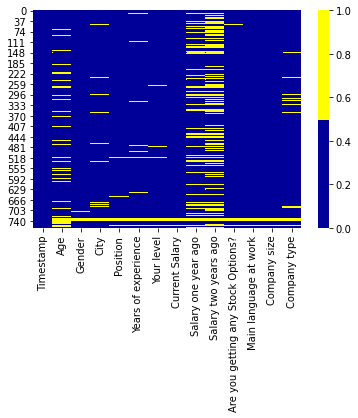

In [6]:
cols = df.columns
colours = ['#000099', '#ffff00']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

Dla uproszczenia operacji na zbiorze nazwa kolumny 'Are you getting any Stock Options?' została skrócona do "Stock options".

In [7]:
df.rename(columns={"Are you getting any Stock Options?" : "Stock options"}, inplace=True)

In [8]:
df

,Timestamp,Age,Gender,City,Position,Years of experience,Your level,Current Salary,Salary one year ago,Salary two years ago,Stock options,Main language at work,Company size,Company type
0,14/12/2018 12:41:33,43.0,M,München,QA Ingenieur,11.0,Senior,77000.0,76200.0,68000.0,No,Deutsch,100-1000,Product
1,14/12/2018 12:42:09,33.0,F,München,Senior PHP Magento developer,8.0,Senior,65000.0,55000.0,55000.0,No,Deutsch,50-100,Product
2,14/12/2018 12:47:36,32.0,M,München,Software Engineer,10.0,Senior,88000.0,73000.0,54000.0,No,Deutsch,1000+,Product
3,14/12/2018 12:50:15,25.0,M,München,Senior Frontend Developer,6.0,Senior,78000.0,55000.0,45000.0,Yes,English,1000+,Product
4,14/12/2018 12:50:31,39.0,M,München,UX Designer,10.0,Senior,69000.0,60000.0,52000.0,No,English,100-1000,Ecom retailer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,03/06/2020 20:12:51,40.0,M,Köln,Java Developer junior,1.0,Junior,44000.0,40000.0,40000.0,Yes,Deutsch,10-50,Product
761,28/07/2020 04:03:13,NaN,M,Köln,E.g. C# Developer,1.0,Junior,45000.0,40000.0,40000.0,Yes,Deutsch,10-50,Product
762,28/07/2020 04:03:20,NaN,M,Köln,E.g. C# Developer,1.0,Junior,45000.0,40000.0,40000.0,Yes,Deutsch,10-50,Product
763,26/08/2020 09:06:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Czyszczenie danych

By móc pracować na najlepszym jakościowo zbiorze danych w następnej kolejności zostanie przeprowadzone jego czyszczenie. Każdy możliwy do napotkania problem zostanie przedstawiony osobno, by pod jego kątem możliwe było sprawdzenie każdej kolumny z osobna

### Nieprawidłowe wartości danych

#### Timestamp
Kolumna odpowiadająca za sygnaturę czasową może posiadać nieprawidłowe dane ze zwględu na dwa przypadki
* Nieprawdiłowy format zapisu
* Sygnatura poza ramami czasowymi ustalonymi dla zbioru danych

Na początku zostanie rozpatrzona nieprawidłowść danych ze względu na format zapisu

Dokonać tego można w bardzo prosty sposób - poprzez zrzutowanie typu danych na prawidłowy - Timestamp.
Jak widać po wynikać poniższej operacji nie został wypisany błąd - dane zostały przetworzone prawidłowo, co nasuwa wniosek iż wszystkie były w prawidłowym formacie. Dla potwierdzenia została wykonana operacja potwierdzająca poprawną konwersję danych na typ Timestamp.

In [9]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format="%d/%m/%Y %H:%M:%S", exact=True)
print(pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df['Timestamp']))

True


Problem sygnatury czasowej poza ramami ustalonymi dla zbioru danych w momencie posiadania kolumny o prawidłowym typie danych również nie jest trudny do rozwiązania.
W tym przypadku rozważamy zbiór wyników ankiety pracowników IT w roku 2018. 

Oznacza to że wszystkie wyniki ankiety o sygnaturach czasowych przed oraz po 2018 roku leżą poza jego zakresami, więc stanowią one nieprawidłowe dane oraz zostaną usunięte ze zbioru.

In [10]:
from_ts = '2018-01-01 00:00:00'
to_ts = '2018-12-31 23:59:59'
df = df[(df['Timestamp'] > from_ts) & (df['Timestamp'] < to_ts)]
df

,Timestamp,Age,Gender,City,Position,Years of experience,Your level,Current Salary,Salary one year ago,Salary two years ago,Stock options,Main language at work,Company size,Company type
0,2018-12-14 12:41:33,43.0,M,München,QA Ingenieur,11.0,Senior,77000.0,76200.0,68000.0,No,Deutsch,100-1000,Product
1,2018-12-14 12:42:09,33.0,F,München,Senior PHP Magento developer,8.0,Senior,65000.0,55000.0,55000.0,No,Deutsch,50-100,Product
2,2018-12-14 12:47:36,32.0,M,München,Software Engineer,10.0,Senior,88000.0,73000.0,54000.0,No,Deutsch,1000+,Product
3,2018-12-14 12:50:15,25.0,M,München,Senior Frontend Developer,6.0,Senior,78000.0,55000.0,45000.0,Yes,English,1000+,Product
4,2018-12-14 12:50:31,39.0,M,München,UX Designer,10.0,Senior,69000.0,60000.0,52000.0,No,English,100-1000,Ecom retailer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,2018-12-31 07:45:22,42.0,M,München,IT специалист,18.0,Senior,127000.0,123000.0,118000.0,No,Deutsch,1000+,Automotive
704,2018-12-31 10:58:13,27.0,M,München,Software Developer,6.0,Middle,65000.0,65000.0,50000.0,No,Deutsch,100-1000,Product
705,2018-12-31 16:29:27,42.0,M,Berlin,Ruby Developer,20.0,Senior,93000.0,65000.0,NaN,Yes,English,1000+,Product
706,2018-12-31 21:40:32,26.0,F,Berlin,Front End Developer,3.0,Junior,27000.0,NaN,NaN,No,English,10-50,Product


Jak widać zawęziło to zbiór danych do 708 wpisów.

Kolumna "Timestamp" nie posiadała żadnych pustych danych brakujących wartości danych, jednak powtórne wyrysowanie heatmapy brakujących wartości danych oraz wstępne wypisanie wartości zbioru nasuwa wniosek - iż dane w zbiorze były posortowane właśnie względem sygnatury czasowej rosnąco. Co sprawiło że wpisy posiadające największe braki wartości danych (u dołu wykresu) w następstwie ostatniej operacji odpadły ze zbioru.

<AxesSubplot:>

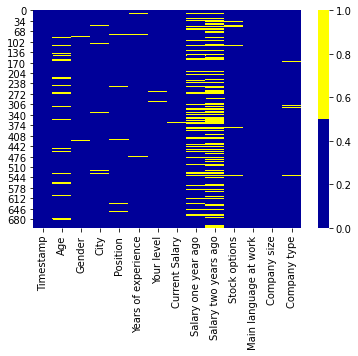

In [11]:
cols = df.columns
colours = ['#000099', '#ffff00']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

#### City

Kolumna miasta mówi o mieście w którym pracuje ankietowany. Kolumna ta posiada brakujące wartości danych oraz nieprawidłowe dane.
Na początku rozwiązany zostanie problem nieprawidłowych danych.

In [12]:
print(df['City'].value_counts(dropna=False).index.tolist())

['Berlin', 'München', 'Frankfurt', nan, 'Hamburg', 'Amsterdam', 'Stuttgart', 'Köln', 'London', 'Dublin', 'Krakow', 'Luxembourg', 'Karlsruhe', 'Stuttgart ', 'Stockholm', 'Eindhoven', 'Nürnberg', 'Amsterdam ', 'Tallinn', 'Prague', 'Nürnberg ', 'Vienna', 'Bonn', 'Moscow', 'Bitburg', 'Karlskrona', 'Dublin ', 'Brussels', 'Frankonia', 'Leipzig', 'Poland', 'Lisbon', 'Memmingen', 'Bremen', 'Regensburg', 'Düsseldorf', 'Augsburg ', 'Erlangen', 'Konstanz', 'homeoffice', 'Ludwigsburg', 'Bern', 'Gdansk', 'Hildesheim', 'Strasbourg', 'Alicante, Spain', 'Essen', 'Mannheim ', 'oslo', 'Krakow, Poland', 'Belgrade, Serbia', 'Zurich', 'bremen', 'Bayern', 'saint petersburg', 'Schleswig-Holstein', 'Brno', 'Baden-Württemberg ', 'Dresden', 'Limassol', 'Rosenheim', 'Siegen', 'Warsaw', 'Koblenz', 'Darmstadt', 'Tübingen', 'Kyiv', 'Münster', 'Riga', 'Krakau']


Jak można zauważyć po wartościach wypisanych powyżej w kolumnie występują wartości które nie mogą zostać uznane za poprawne ze względu na dodatkowe dane takie jak nazwa kraju po przecinku. Zmienion również wielkość liter - unknie to ukrytych duplikatów.
Nazwy miast są również w innych językach - na potrzeby czyszczenia wszystkie nazwy zostaną przetłumaczone na angielski - by uniknąć ukrytych duplikatów. Został też rozwiązany problem polegający na obecnych wartości regionów i krajów - zostały one przerzutowane na stolicę lub miasto nadrzędne tego kraju lub regionu. Usunięta został wpis z wartością Home Office

In [13]:
def clean_string(a):
    if a==a:
        return a.strip().lower()
    else:
        return np.nan

df['City'] = df['City'].apply(clean_string)

df['City'].loc[df['City']=='münchen'] = 'munich'
df['City'].loc[df['City']=='köln'] = 'cologne'
df['City'].loc[df['City']=='krakow'] = 'cracow'
df['City'].loc[df['City']=='krakow, poland'] = 'cracow'
df['City'].loc[df['City']=='nürnberg'] = 'nuremberg'
df['City'].loc[df['City']=='münster'] = 'muenster'
df['City'].loc[df['City']=='krakau'] = 'cracow'
df['City'].loc[df['City']=='poland'] = 'warsaw'
df['City'].loc[df['City']=='frankonia'] = 'nuremberg'
df['City'].loc[df['City']=='belgrade, serbia'] = 'belgrade'
df['City'].loc[df['City']=='frankonia'] = 'nuremberg'
df['City'].loc[df['City']=='baden-württemberg'] = 'stuttgart'
df['City'].loc[df['City']=='düsseldorf'] = 'dusseldorf'
df['City'].loc[df['City']=='schleswig-holstein'] = 'kiel'
df['City'].loc[df['City']=='alicante, spain'] = 'alicante'

df = df[df['City'] != 'homeoffice']

print(df['City'].value_counts(dropna=False).index.tolist())

['berlin', 'munich', 'frankfurt', nan, 'stuttgart', 'amsterdam', 'hamburg', 'cologne', 'cracow', 'dublin', 'nuremberg', 'london', 'luxembourg', 'karlsruhe', 'stockholm', 'bremen', 'bonn', 'tallinn', 'moscow', 'eindhoven', 'warsaw', 'prague', 'vienna', 'brno', 'leipzig', 'zurich', 'mannheim', 'saint petersburg', 'augsburg', 'dusseldorf', 'brussels', 'memmingen', 'kyiv', 'strasbourg', 'alicante, spain', 'belgrade', 'muenster', 'karlskrona', 'bern', 'darmstadt', 'bayern', 'tübingen', 'limassol', 'regensburg', 'oslo', 'essen', 'hildesheim', 'riga', 'koblenz', 'kiel', 'siegen', 'erlangen', 'lisbon', 'dresden', 'rosenheim', 'bitburg', 'gdansk', 'konstanz', 'ludwigsburg']


In [14]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 707 entries, 0 to 707
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Timestamp              707 non-null    datetime64[ns]
 1   Age                    636 non-null    float64       
 2   Gender                 705 non-null    object        
 3   City                   689 non-null    object        
 4   Position               695 non-null    object        
 5   Years of experience    689 non-null    float64       
 6   Your level             699 non-null    object        
 7   Current Salary         706 non-null    float64       
 8   Salary one year ago    565 non-null    float64       
 9   Salary two years ago   439 non-null    float64       
 10  Stock options          698 non-null    object        
 11  Main language at work  706 non-null    object        
 12  Company size           706 non-null    object        
 13  Compa

,Timestamp,Age,Gender,City,Position,Years of experience,Your level,Current Salary,Salary one year ago,Salary two years ago,Stock options,Main language at work,Company size,Company type
0,2018-12-14 12:41:33,43.0,M,munich,QA Ingenieur,11.0,Senior,77000.0,76200.0,68000.0,No,Deutsch,100-1000,Product
1,2018-12-14 12:42:09,33.0,F,munich,Senior PHP Magento developer,8.0,Senior,65000.0,55000.0,55000.0,No,Deutsch,50-100,Product
2,2018-12-14 12:47:36,32.0,M,munich,Software Engineer,10.0,Senior,88000.0,73000.0,54000.0,No,Deutsch,1000+,Product
3,2018-12-14 12:50:15,25.0,M,munich,Senior Frontend Developer,6.0,Senior,78000.0,55000.0,45000.0,Yes,English,1000+,Product
4,2018-12-14 12:50:31,39.0,M,munich,UX Designer,10.0,Senior,69000.0,60000.0,52000.0,No,English,100-1000,Ecom retailer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,2018-12-31 07:45:22,42.0,M,munich,IT специалист,18.0,Senior,127000.0,123000.0,118000.0,No,Deutsch,1000+,Automotive
704,2018-12-31 10:58:13,27.0,M,munich,Software Developer,6.0,Middle,65000.0,65000.0,50000.0,No,Deutsch,100-1000,Product
705,2018-12-31 16:29:27,42.0,M,berlin,Ruby Developer,20.0,Senior,93000.0,65000.0,NaN,Yes,English,1000+,Product
706,2018-12-31 21:40:32,26.0,F,berlin,Front End Developer,3.0,Junior,27000.0,NaN,NaN,No,English,10-50,Product


#### Kolumny Salary one year ago i Salary two years ago

Obie te kolumny patrząc mają dość rozległy problem brakujących wartości danych - na tyle rozległy że staranie się ich uzupełnić mogło by stanowić zbyt duże przekłamanie w procesie analizy, a usunięcie wpisów zbyt uszczupliłoby zbiór danych. 
Poniżej zamieszczony został skład procentowy udziału brakujących wartości w każdej z kolumn
jak można zaobserwować dwie rozpatrywane kolumny mają największe wyniki.
* Salary one year ago (20.06%) - co piąta wartość w tej kolumnie jest pusta!
* Salary two years ago (37.99%) - prawie co czwarta

Z uwagi na to postanowino usunąć je ze zbioru danych.

In [15]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100 , 2)))

Timestamp - 0.0%
Age - 10.04%
Gender - 0.28%
City - 2.55%
Position - 1.7%
Years of experience - 2.55%
Your level - 1.13%
Current Salary - 0.14%
Salary one year ago - 20.08%
Salary two years ago - 37.91%
Stock options - 1.27%
Main language at work - 0.14%
Company size - 0.14%
Company type - 2.83%


In [16]:
df.drop(columns=['Salary one year ago','Salary two years ago'],inplace=True)
df

,Timestamp,Age,Gender,City,Position,Years of experience,Your level,Current Salary,Stock options,Main language at work,Company size,Company type
0,2018-12-14 12:41:33,43.0,M,munich,QA Ingenieur,11.0,Senior,77000.0,No,Deutsch,100-1000,Product
1,2018-12-14 12:42:09,33.0,F,munich,Senior PHP Magento developer,8.0,Senior,65000.0,No,Deutsch,50-100,Product
2,2018-12-14 12:47:36,32.0,M,munich,Software Engineer,10.0,Senior,88000.0,No,Deutsch,1000+,Product
3,2018-12-14 12:50:15,25.0,M,munich,Senior Frontend Developer,6.0,Senior,78000.0,Yes,English,1000+,Product
4,2018-12-14 12:50:31,39.0,M,munich,UX Designer,10.0,Senior,69000.0,No,English,100-1000,Ecom retailer
...,...,...,...,...,...,...,...,...,...,...,...,...
703,2018-12-31 07:45:22,42.0,M,munich,IT специалист,18.0,Senior,127000.0,No,Deutsch,1000+,Automotive
704,2018-12-31 10:58:13,27.0,M,munich,Software Developer,6.0,Middle,65000.0,No,Deutsch,100-1000,Product
705,2018-12-31 16:29:27,42.0,M,berlin,Ruby Developer,20.0,Senior,93000.0,Yes,English,1000+,Product
706,2018-12-31 21:40:32,26.0,F,berlin,Front End Developer,3.0,Junior,27000.0,No,English,10-50,Product


#### Kolumna Current Salary

W kolumnie niosącej informacje o obecnym wynagrodzeniu nie występują nieprawidłowe dane, występują za to brakujące wartości danych. Wpisy je zawierające zostaną usunięte

In [17]:
print(df['Current Salary'].value_counts(dropna=False).index.tolist())
df = df[df['Current Salary'].notna()]

[60000.0, 65000.0, 70000.0, 75000.0, 55000.0, 80000.0, 72000.0, 90000.0, 68000.0, 58000.0, 50000.0, 85000.0, 66000.0, 57000.0, 78000.0, 52000.0, 120000.0, 69000.0, 62000.0, 95000.0, 53000.0, 42000.0, 56000.0, 130000.0, 45000.0, 77000.0, 63000.0, 48000.0, 61000.0, 87000.0, 44000.0, 67000.0, 84000.0, 47000.0, 54000.0, 73000.0, 83000.0, 46000.0, 30000.0, 100000.0, 92000.0, 40000.0, 96000.0, 115000.0, 24000.0, 35000.0, 89000.0, 86000.0, 64000.0, 74000.0, 110000.0, 43000.0, 40800.0, 112000.0, 62500.0, 36000.0, 58500.0, 39600.0, 88000.0, 125000.0, 76000.0, 34000.0, 37000.0, 71000.0, 49000.0, 140000.0, 200000.0, 38000.0, 73500.0, 47300.0, 38400.0, 127000.0, nan, 55800.0, 33600.0, 32000.0, 19200.0, 60500.0, 128000.0, 93000.0, 108000.0, 53500.0, 64400.0, 107000.0, 59000.0, 51000.0, 48500.0, 57500.0, 68400.0, 111000.0, 50400.0, 53600.0, 51600.0, 94500.0, 51750.0, 33000.0, 102000.0, 109000.0, 92100.0, 132000.0, 39000.0, 20400.0, 69600.0, 132250.0, 138000.0, 39150.0, 67200.0, 27000.0, 73300.0, 150

In [18]:
df

,Timestamp,Age,Gender,City,Position,Years of experience,Your level,Current Salary,Stock options,Main language at work,Company size,Company type
0,2018-12-14 12:41:33,43.0,M,munich,QA Ingenieur,11.0,Senior,77000.0,No,Deutsch,100-1000,Product
1,2018-12-14 12:42:09,33.0,F,munich,Senior PHP Magento developer,8.0,Senior,65000.0,No,Deutsch,50-100,Product
2,2018-12-14 12:47:36,32.0,M,munich,Software Engineer,10.0,Senior,88000.0,No,Deutsch,1000+,Product
3,2018-12-14 12:50:15,25.0,M,munich,Senior Frontend Developer,6.0,Senior,78000.0,Yes,English,1000+,Product
4,2018-12-14 12:50:31,39.0,M,munich,UX Designer,10.0,Senior,69000.0,No,English,100-1000,Ecom retailer
...,...,...,...,...,...,...,...,...,...,...,...,...
703,2018-12-31 07:45:22,42.0,M,munich,IT специалист,18.0,Senior,127000.0,No,Deutsch,1000+,Automotive
704,2018-12-31 10:58:13,27.0,M,munich,Software Developer,6.0,Middle,65000.0,No,Deutsch,100-1000,Product
705,2018-12-31 16:29:27,42.0,M,berlin,Ruby Developer,20.0,Senior,93000.0,Yes,English,1000+,Product
706,2018-12-31 21:40:32,26.0,F,berlin,Front End Developer,3.0,Junior,27000.0,No,English,10-50,Product


#### Main language at work

Kolumna języka głównie wykorzystywanego w pracy ankietowanego. Kolumna ta posiada brakujące wartości danych w niewielkiej ilości oraz nieprawidłowe dane.
Na początku rozwiązany zostanie problem nieprawidłowych danych.

Tak jak w przypadku kolumny "City" zostaną wyczyszczone znaki nadmiarowe typu suffix spacji by weliminować ukryte duplikaty. Niektóre wartości są w innym języku więc zostaną przetłumaczone na angielskie odpowiedniki. Niektóre odpowiedzi złożone zostaną rozbite i jako wartość zostanie rozpatrzony pierwszy wspomniany język.

In [19]:
df['Main language at work'] = df['Main language at work'].apply(clean_string)

df['Main language at work'].loc[df['Main language at work']=='deutsch'] = 'german'
df['Main language at work'].loc[df['Main language at work']=='deutsch/englisch'] = 'german'
df['Main language at work'].loc[df['Main language at work']=='team - russian; cross-team - english;'] = 'russian'

print(df['Main language at work'].value_counts(dropna=False).index.tolist())

['english', 'german', 'russian', 'polish', 'french', nan]


## Analiza danych

In [21]:
df.corr()

,Age,Years of experience,Current Salary
Age,1.000000,0.662642,0.262562
Years of experience,0.662642,1.000000,0.418542
Current Salary,0.262562,0.418542,1.000000


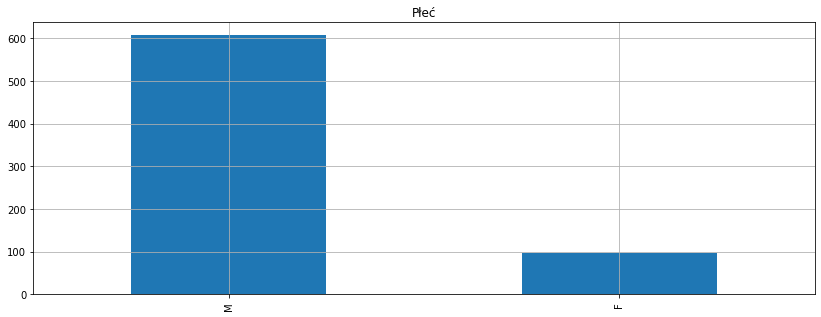

In [36]:
pyplot.figure(figsize=(14,5))
val = df['Gender'].value_counts()
val.plot(kind='bar')
pyplot.title('Płeć')
        
pyplot.grid()
pyplot.show()

Jak można zauważyć przeważająca część ankietowych stanowili mężczyźni - co wskazywałoby na to że w roku 2018 w dalszym ciągu stanowili oni nieproporcjonalnie większą część branży.

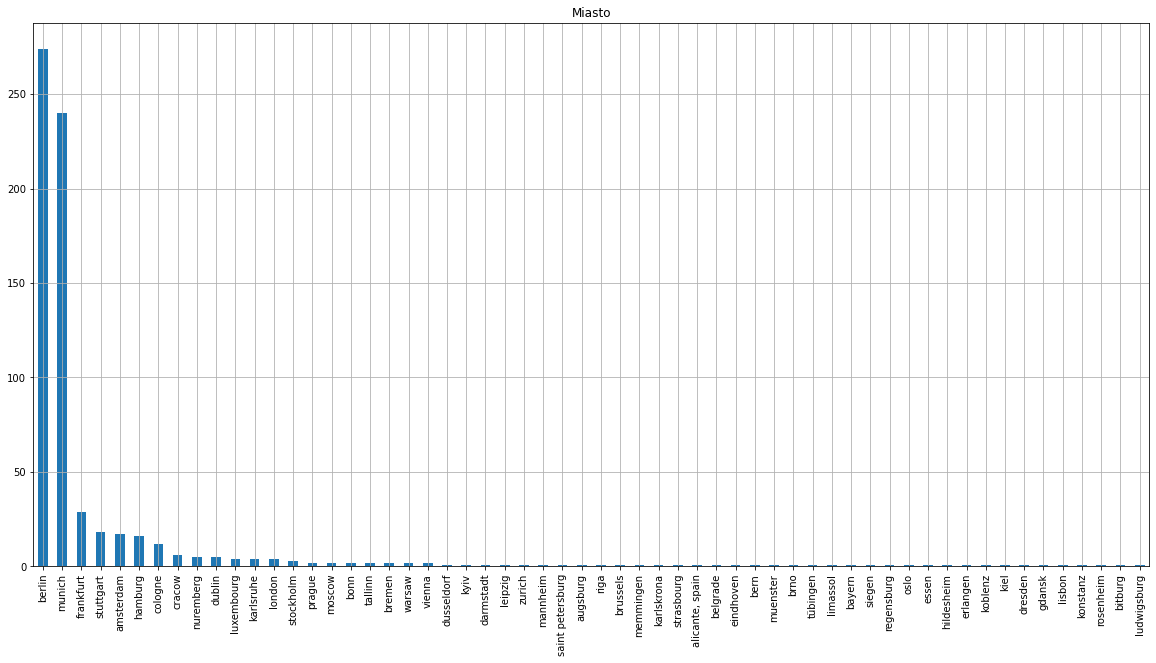

In [43]:
pyplot.figure(figsize=(20,10))
val = df['City'].value_counts()
val.plot(kind='bar')
pyplot.title('Miasto')
        
pyplot.grid()
pyplot.show()

Jak widać po powyższym wykresie w ścisłej czołówce jeśli chodzi o miasto, trzymają się miasta niemieckie. Co nie budzi większego zaskoczenia gdyż ankieta była głównie celowana na region Niemiec i krajów Beneluxu. Co może budzić zaskoczenie to fakt iż w zestawieniu znalazły się tak odległe miasta jak np. Saint Petersburg, oraz kilka polskich miast.

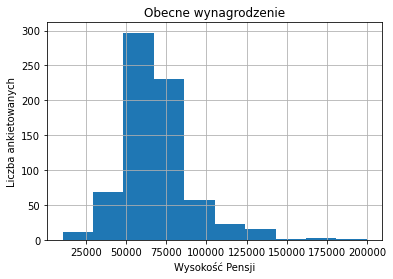

count       706.000000
mean      68712.703966
std       21421.729385
min       10300.000000
25%       57125.000000
50%       65000.000000
75%       75000.000000
max      200000.000000
Name: Current Salary, dtype: float64

In [40]:
pyplot.hist(df['Current Salary'])
pyplot.ylabel('Liczba ankietowanych')
pyplot.xlabel('Wysokość Pensji')
pyplot.title('Obecne wynagrodzenie')
pyplot.grid()
pyplot.show()

df['Current Salary'].describe()

Jak można zauważyć najbardziej popularną wartością wynagrodzenia są wartości w okolicach 50 000 do ok. 75 000.

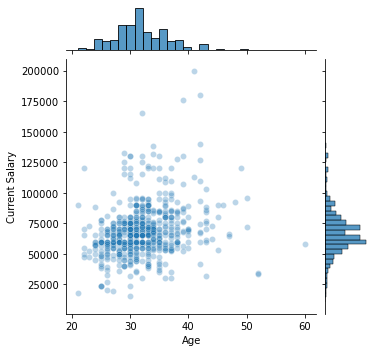

In [59]:
sns.jointplot(x=df['Age'], y=df['Current Salary'],
              height=5,
              joint_kws={'alpha' : 0.3})
pyplot.show()

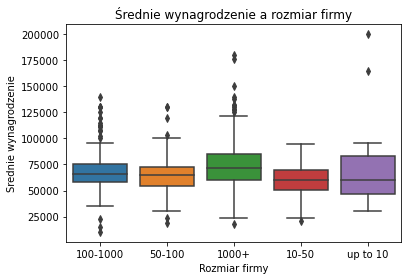

In [50]:
sns.boxplot(data = df, x = "Company size", y = "Current Salary")
pyplot.ylabel("Srednie wynagrodzenie")
pyplot.xlabel("Rozmiar firmy")
pyplot.title("Średnie wynagrodzenie a rozmiar firmy")
pyplot.show()

Zauważyć można że największe zarobki osiągnąć można w największych firmach, często korporacjach które to osiągają co do zasady największe zyski, jednak nie jest to regułą i w pozostałych rozmiarach również zdarzają się duże zarobki. 

Co ciekawe rozmiar firmy do 10 osób może pochwalić się jedną z najmniejszych rozpiętości wysokości wynagrodzeń przy prawie najniższej medianie wynagrodzeń co może wynikać z faktu że małe firmy zatrudniają głównie najpotrzebniejsze osoby wraz z kadrą zarządzającą.

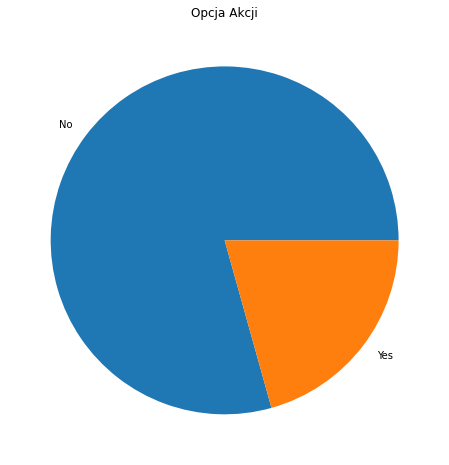

In [61]:
df['Stock options'].groupby(df['Stock options']).size().plot(kind='pie', subplots=True, figsize=(8, 8))
pyplot.title("Opcje Akcji")
pyplot.show()

Stanowcza większość firm nie oferuje swoim pracownikom akcji w ramach wynagrodzenia. Jednak w następnej kolejności należy przyjżeć się tym które dają.

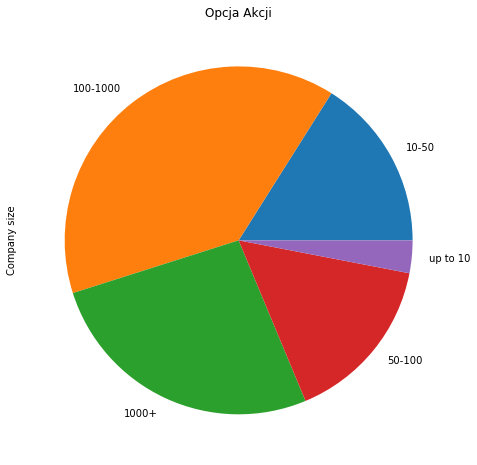

In [66]:
df4 = df[df['Stock options'] != 'Yes']
df4['Company size'].groupby(df4['Company size']).size().plot(kind='pie', subplots=True, figsize=(8, 8))
pyplot.title("Opcje Akcji - Rodzaj firmy")
pyplot.show()

Jak można zaobserować na wykresie największą ilość firm oferujących akcje jest pośród dużych i bardzo dużych firm, co może być podyktowane brakiem obecności giełdowej dla mniejszych podmiotów, dlatego nie są one oferowane.